In [6]:
# importing DF from 'project5_cleaning.ipynb'
%store -r df

import pandas as pd

In [3]:
# How much in total each customer spent 
df_monetary = df.groupby('CustomerID', as_index=False)['Sales'].sum()
df_monetary.head()

,CustomerID,Sales
0,AA-10315,5563.560
1,AA-10375,1056.390
2,AA-10480,1790.512
3,AA-10645,5086.935
4,AB-10015,886.156


In [12]:
# How often the customer made an order
df_frequency = df.groupby('CustomerID', as_index=False)['OrderID'].count()
df_frequency.head()

,CustomerID,OrderID
0,AA-10315,11
1,AA-10375,15
2,AA-10480,12
3,AA-10645,18
4,AB-10015,6


In [56]:
# How many days has it been from the last customer's order
from datetime import datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
last_order_date = df['OrderDate'].max()
today = datetime.today()

df_last_order = df.groupby('CustomerID', as_index=False)['OrderDate'].max()
recency_days = (today - df_last_order['OrderDate']).dt.days
df_last_order.insert(1,'Recency',recency_days)
df_last_order.head()


,CustomerID,Recency,OrderDate
0,AA-10315,2678,2017-06-29
1,AA-10375,2513,2017-12-11
2,AA-10480,2753,2017-04-15
3,AA-10645,2549,2017-11-05
4,AB-10015,2909,2016-11-10


In [79]:
# Merging 3 above df into one df for ml modeling purposing

# df_monetary and df_frequency on 'CustomerID'
df_model = pd.merge(df_monetary, df_frequency, on='CustomerID', how='inner')

# resulting DataFrame with df_recency on 'CustomerID'
df_model = pd.merge(df_model, df_last_order, on='CustomerID', how='inner')

# Display the final combined DataFrame
df_model.head()

,CustomerID,Sales,OrderID,Recency
0,AA-10315,5563.560,11,2678
1,AA-10375,1056.390,15,2513
2,AA-10480,1790.512,12,2753
3,AA-10645,5086.935,18,2549
4,AB-10015,886.156,6,2909
...,...,...,...,...
788,XP-21865,2374.658,28,2537
789,YC-21895,5454.350,8,2498
790,YS-21880,6720.444,12,2503
791,ZC-21910,8025.707,31,2548


In [82]:
df_model = df_model.rename(columns = {'OrderID':'Frequency','Sales':'Amount'})

In [83]:
df_model.drop(columns='OrderDate')

,CustomerID,Amount,Frequency,Recency
0,AA-10315,5563.560,11,2678
1,AA-10375,1056.390,15,2513
2,AA-10480,1790.512,12,2753
3,AA-10645,5086.935,18,2549
4,AB-10015,886.156,6,2909
...,...,...,...,...
788,XP-21865,2374.658,28,2537
789,YC-21895,5454.350,8,2498
790,YS-21880,6720.444,12,2503
791,ZC-21910,8025.707,31,2548


{'whiskers': [<matplotlib.lines.Line2D at 0x305009c70>,
 'caps': [<matplotlib.lines.Line2D at 0x3050082c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x30500bb90>],
 'medians': [<matplotlib.lines.Line2D at 0x305008830>],
 'fliers': [<matplotlib.lines.Line2D at 0x305008ad0>],
 'means': []}

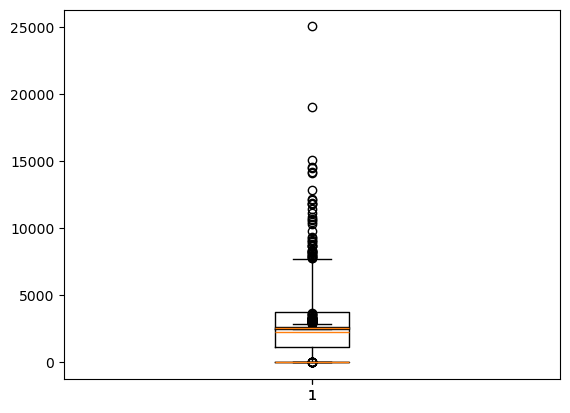

In [84]:
# checking outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.boxplot(df_model['Amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x3050a2b40>,
 'caps': [<matplotlib.lines.Line2D at 0x3050a3b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x3050a28a0>],
 'medians': [<matplotlib.lines.Line2D at 0x3050d4140>],
 'fliers': [<matplotlib.lines.Line2D at 0x3050d4470>],
 'means': []}

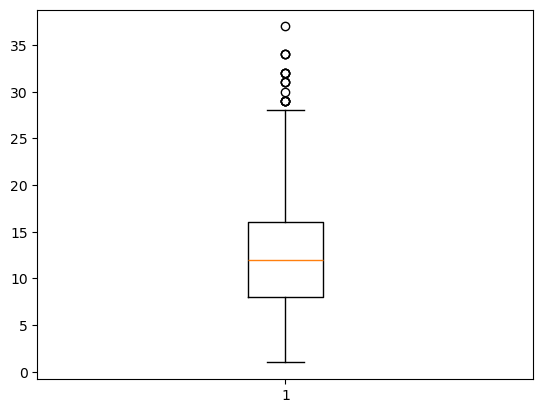

In [85]:
plt.boxplot(df_model['Frequency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x305103140>,
 'caps': [<matplotlib.lines.Line2D at 0x305103770>,
 'boxes': [<matplotlib.lines.Line2D at 0x305102e10>],
 'medians': [<matplotlib.lines.Line2D at 0x305103b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x305103e90>],
 'means': []}

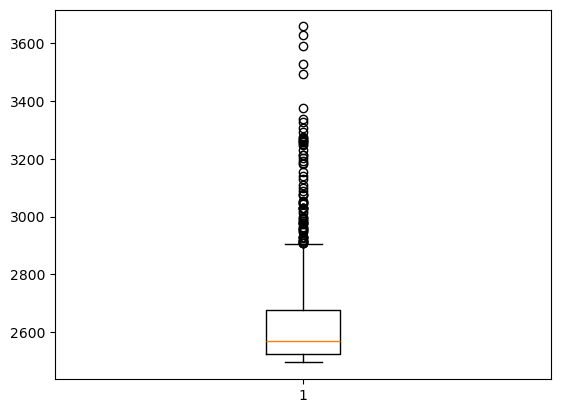

In [86]:
plt.boxplot(df_model['Recency'])

In [95]:
# Cutting out the outliers
import numpy as np
# Calculate Interquartile Range (IQR) for price
q1 = np.percentile(df_model['Amount'], 25)
q3 = np.percentile(df_model['Amount'], 75)
iqr = q3-q1

q1_f = np.percentile(df_model['Frequency'], 25)
q3_f = np.percentile(df_model['Frequency'], 75)
iqr_f = q3_f-q1_f

q1_r = np.percentile(df_model['Recency'], 25)
q3_r = np.percentile(df_model['Recency'], 75)
iqr_r = q3_r-q1_r


In [92]:
df_model_copy = df_model.copy()

In [103]:
df_model = df_model[(df_model['Amount'] > q1-(1.5*iqr)) & (df_model['Amount'] < q3+(1.5*iqr))]
df_model = df_model[(df_model['Frequency'] > q1_f-(1.5*iqr_f)) & (df_model['Frequency'] < q3_f+(1.5*iqr_f))]
df_model = df_model[(df_model['Recency'] > q1_r-(1.5*iqr_r)) & (df_model['Recency'] < q3_r+(1.5*iqr_r))]

{'whiskers': [<matplotlib.lines.Line2D at 0x30538fd10>,
 'caps': [<matplotlib.lines.Line2D at 0x3053ac2f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x30538c0b0>],
 'medians': [<matplotlib.lines.Line2D at 0x3053ac8f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x3053acb90>],
 'means': []}

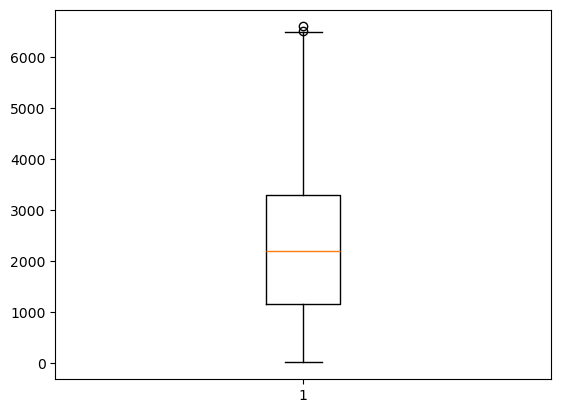

In [98]:
plt.boxplot(df_model['Amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x3053eaf90>,
 'caps': [<matplotlib.lines.Line2D at 0x3053eb500>,
 'boxes': [<matplotlib.lines.Line2D at 0x3053ead20>],
 'medians': [<matplotlib.lines.Line2D at 0x3053ebb60>],
 'fliers': [<matplotlib.lines.Line2D at 0x3053ebe90>],
 'means': []}

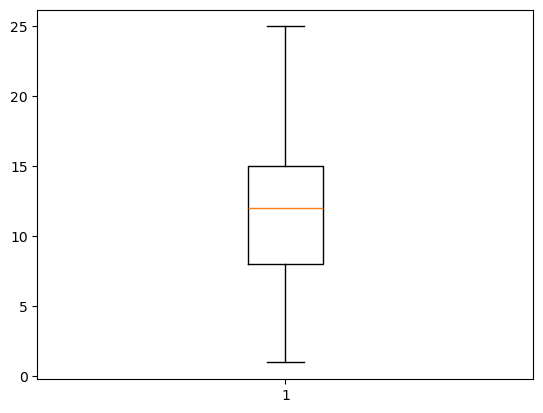

In [99]:
plt.boxplot(df_model['Frequency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x3054a0fe0>,
 'caps': [<matplotlib.lines.Line2D at 0x3054a15b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x3054a0710>],
 'medians': [<matplotlib.lines.Line2D at 0x3054a1be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x3054a1f10>],
 'means': []}

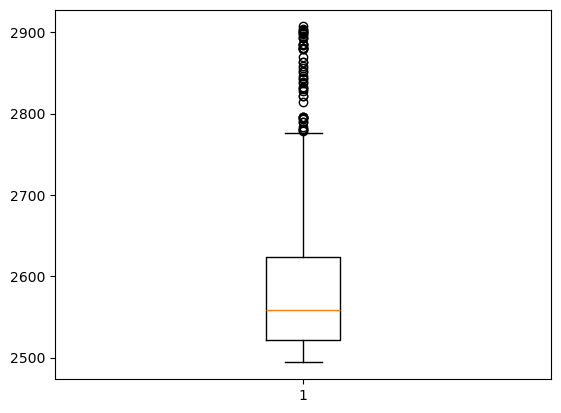

In [102]:
plt.boxplot(df_model['Recency'])

In [ ]:
# Recency is very spread, trying to focus on the 2500 - 2650 ???

In [107]:
from sklearn.preprocessing import StandardScaler

# Rescaling the attributes using standarisation scaling
rfm_df = df_model[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
df_model_scaled = scaler.fit_transform(rfm_df)
df_model_scaled.shape

df_model_scaled = pd.DataFrame(df_model_scaled)
df_model_scaled.columns = ['Amount', 'Frequency', 'Recency']
df_model_scaled.head()

,Amount,Frequency,Recency
0,2.028726,-0.216882,0.854419
1,-0.860635,0.559580,-0.814888
2,-0.390019,-0.022767,1.613195
3,1.723181,1.141926,-0.450676
4,-0.918125,-0.022767,-0.592314


In [126]:
# k-means with some arbitrary k
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_model_scaled)

KMeans(max_iter=50, n_clusters=3)

In [127]:
# Assigning labels to each data point, and execute the following script.

from collections import Counter
kmeans.labels_
label_list=kmeans.labels_
sorted(Counter(label_list).items())

[(0, 267), (1, 103), (2, 278)]

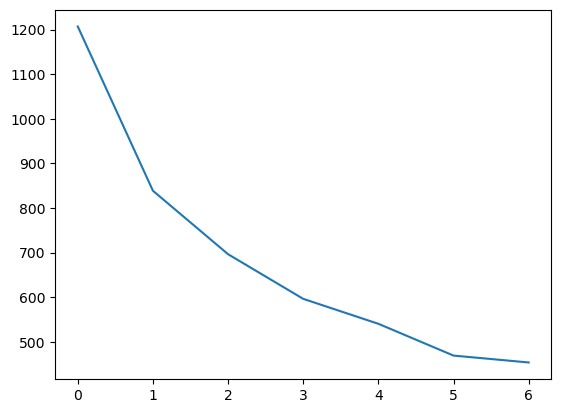

In [133]:
# Elbow-curve /SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8] #where is it from ? Always same values?
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_model_scaled)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.plot(ssd)

In [129]:
# Silhouette analysis
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_model_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(df_model_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.3418652186313326
For n_clusters=3, the silhouette score is 0.36609952809514773
For n_clusters=4, the silhouette score is 0.3153478478208018
For n_clusters=5, the silhouette score is 0.3107546944132728
For n_clusters=6, the silhouette score is 0.30787303390624443
For n_clusters=7, the silhouette score is 0.2775163162000024
For n_clusters=8, the silhouette score is 0.27141369144388067


In [134]:
# Silhouette analysis for the best score: n=3 
from sklearn.metrics import silhouette_score

    # intialise kmeans
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_model_scaled)

cluster_labels = kmeans.labels_

    # silhouette score
silhouette_avg = silhouette_score(df_model_scaled, cluster_labels)
print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=8, the silhouette score is 0.36607492207015313


In [135]:
# assign the label
df_model['Cluster_Id'] = kmeans.labels_
df_model.head()

,CustomerID,Amount,Frequency,Recency,OrderDate,Cluster_Id
0,AA-10315,5563.560,11,2678,2017-06-29,1
1,AA-10375,1056.390,15,2513,2017-12-11,2
2,AA-10480,1790.512,12,2753,2017-04-15,0
3,AA-10645,5086.935,18,2549,2017-11-05,1
7,AB-10150,966.710,12,2535,2017-11-19,2


<Axes: xlabel='Cluster_Id', ylabel='Amount'>

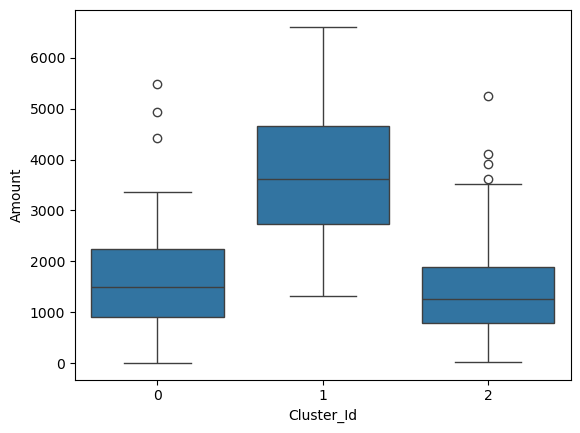

In [136]:
# Box plot to visualize Cluster Id vs Amount
sns.boxplot(x='Cluster_Id', y='Amount', data=df_model)

<Axes: xlabel='Cluster_Id', ylabel='Frequency'>

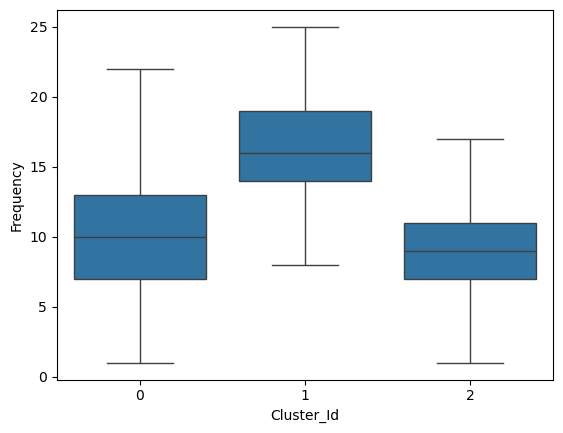

In [137]:
# Box plot to visualize Cluster Id vs Frequency
sns.boxplot(x='Cluster_Id', y='Frequency', data=df_model)


In [ ]:
# plotly 3D model from the previous hypertuning lectures